<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-basic-libraries" data-toc-modified-id="Import-basic-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import basic libraries</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-spliting" data-toc-modified-id="Data-spliting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data spliting</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Create-pipeline" data-toc-modified-id="Create-pipeline-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create pipeline</a></span></li></ul></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#GradientBoosting" data-toc-modified-id="GradientBoosting-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>GradientBoosting</a></span></li><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Adaboost</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>SVM</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Dump-model-in-pickle" data-toc-modified-id="Dump-model-in-pickle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dump model in pickle</a></span></li></ul></div>

## Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [62]:
from sklearn import set_config

set_config(display='diagram')

## Import dataset

In [6]:
df= pd.read_csv('adult.csv.zip')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.axes

[RangeIndex(start=0, stop=32561, step=1),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
        'marital.status', 'occupation', 'relationship', 'race', 'sex',
        'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
        'income'],
       dtype='object')]

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [13]:
df[df=='?']= np.nan

In [14]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

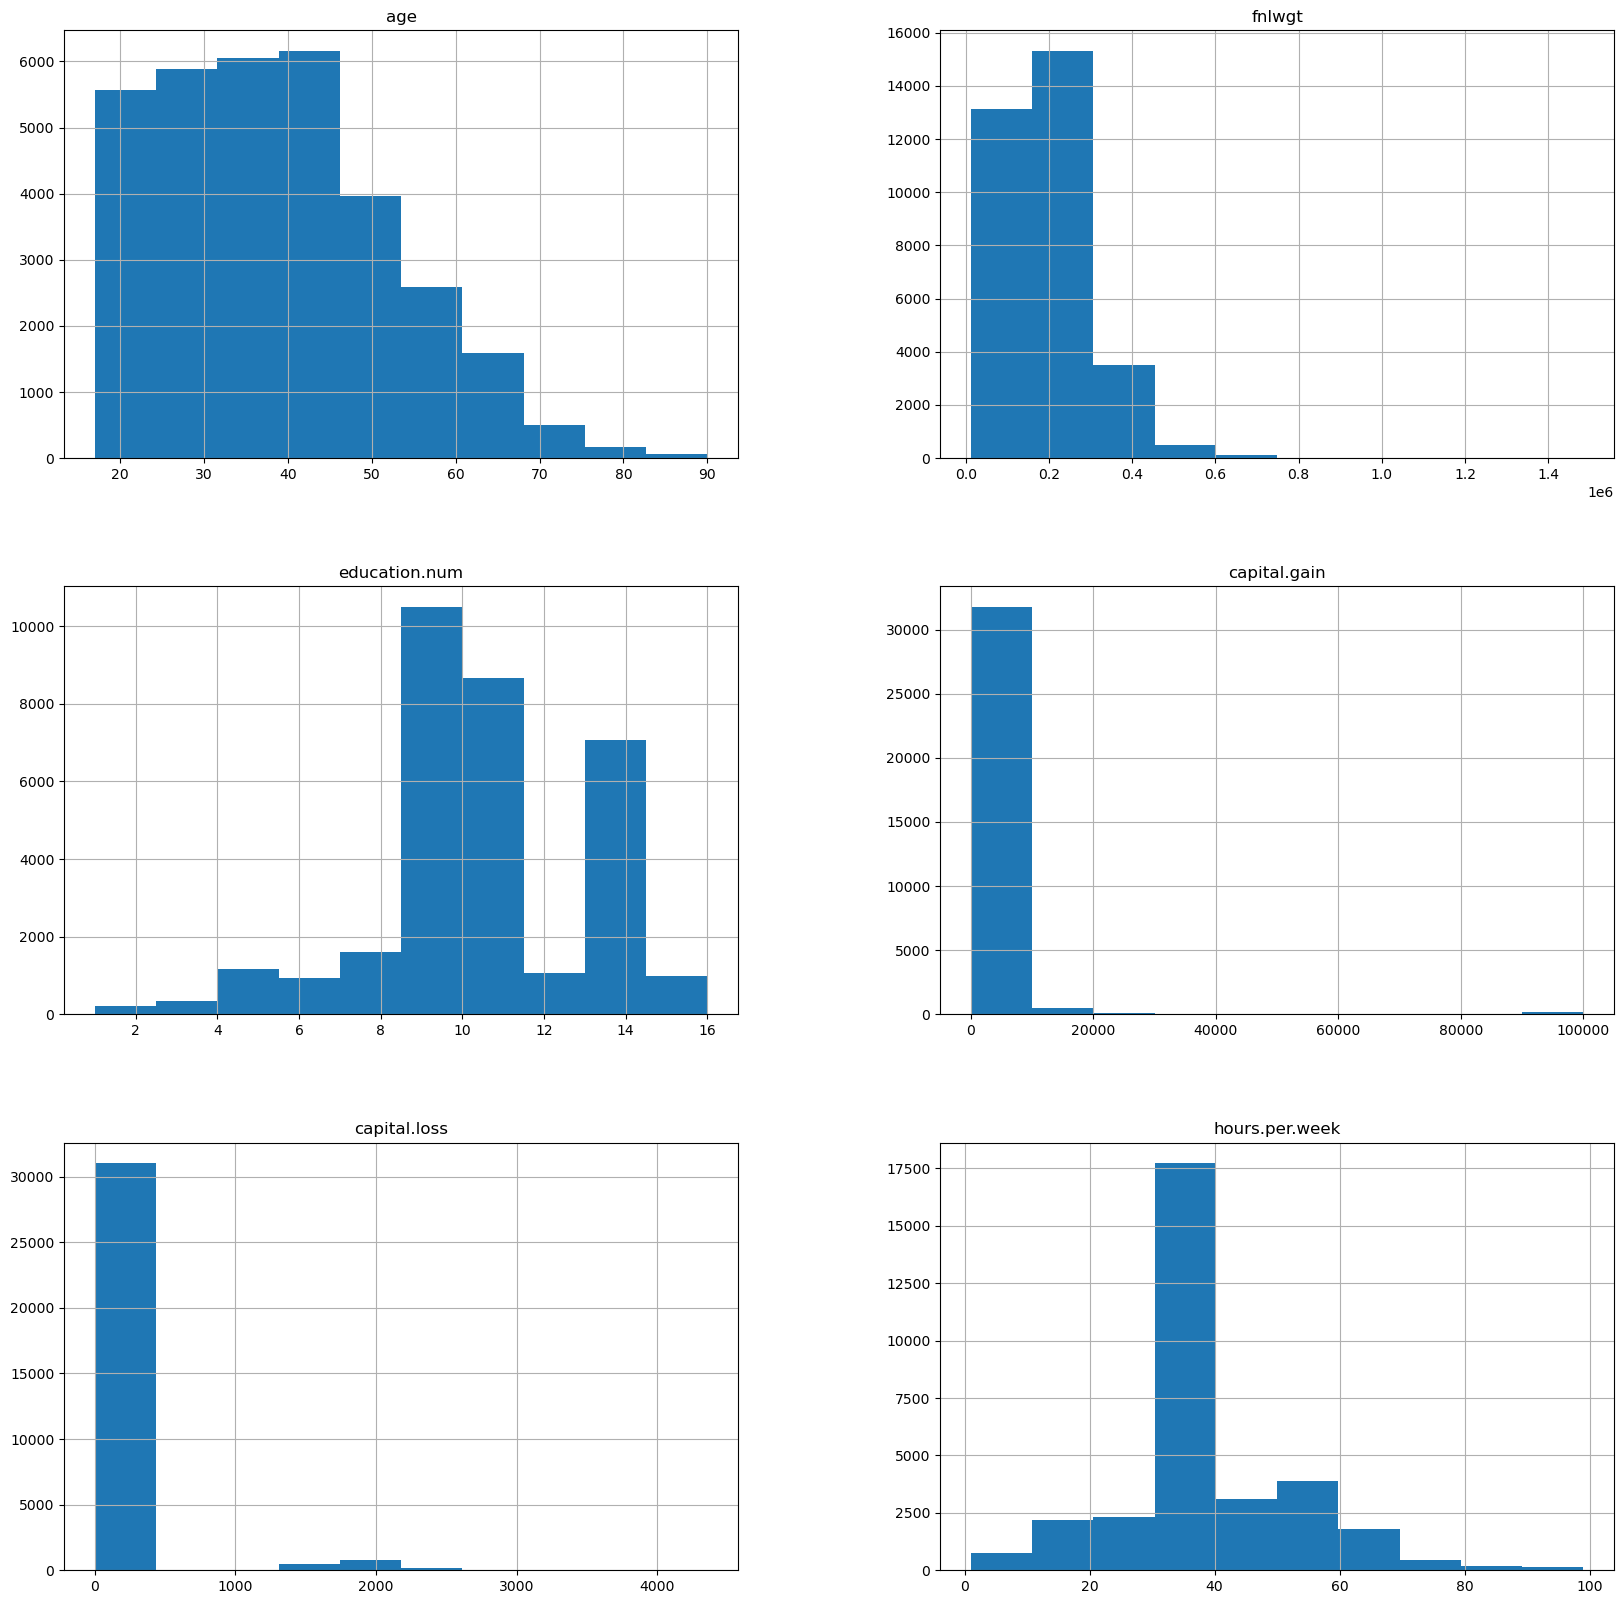

In [16]:
# for outlier detection

df.hist(['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week'],figsize=(20,20))

plt.show()

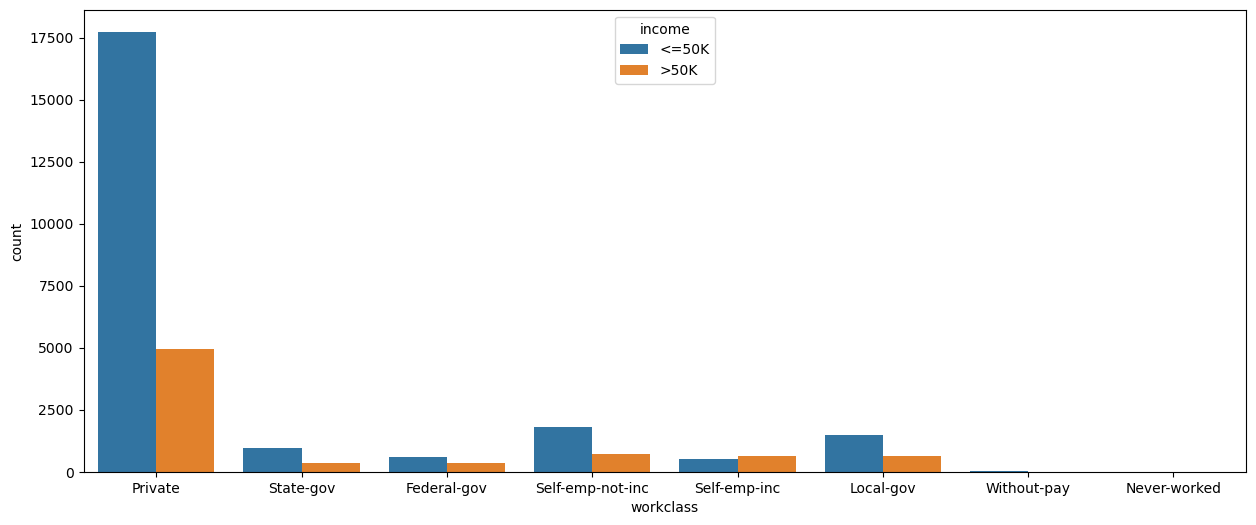

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot(x ='workclass', hue = "income", data = df)
plt.show()

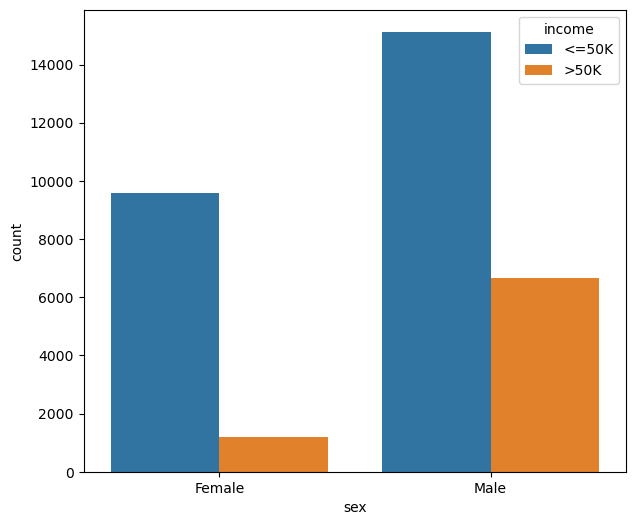

In [18]:
plt.subplots(figsize=(7,6))
sns.countplot(x ='sex', hue = "income", data = df)
plt.show()

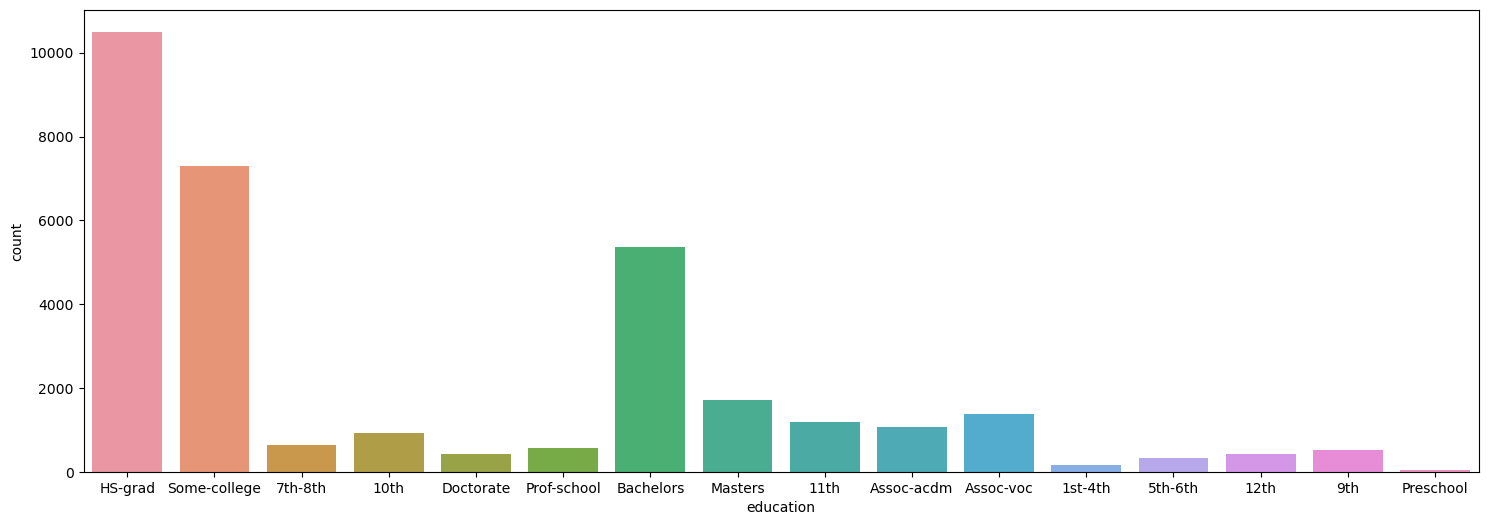

In [19]:
plt.subplots(figsize=(18,6))
sns.countplot(x ='education', data = df)
plt.show()

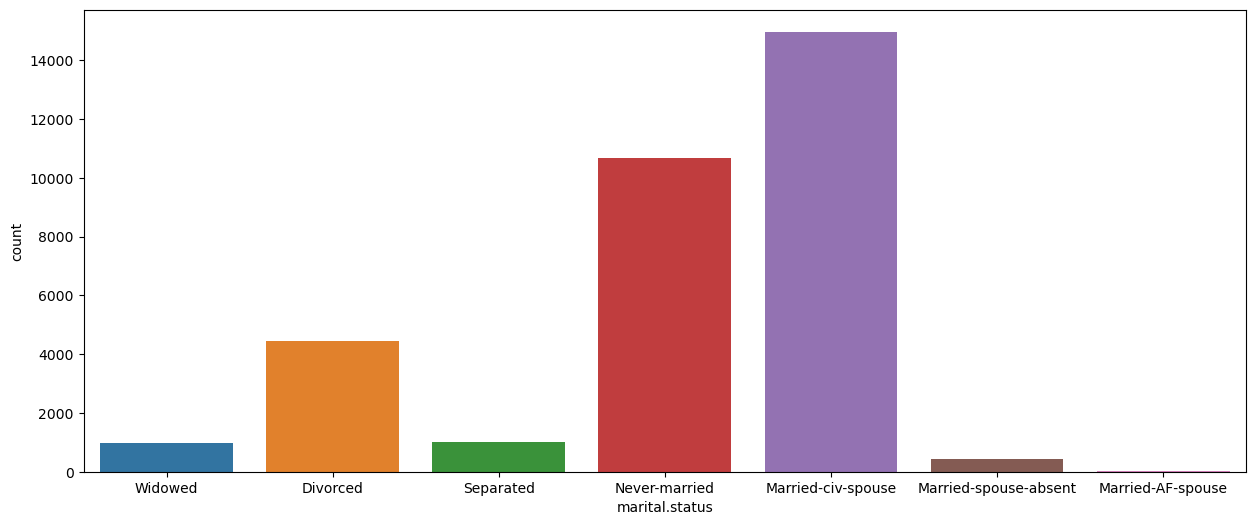

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot(x ='marital.status', data = df)
plt.show()

<AxesSubplot:xlabel='income', ylabel='age'>

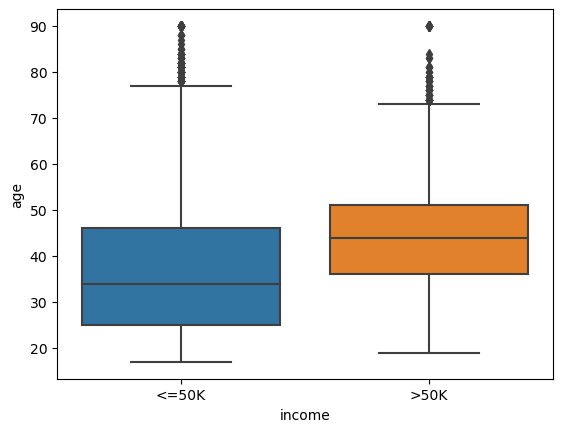

In [21]:
sns.boxplot(df.income,df['age'])

<AxesSubplot:xlabel='age'>

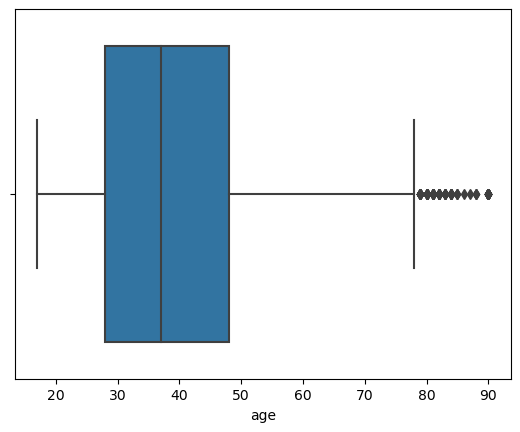

In [22]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

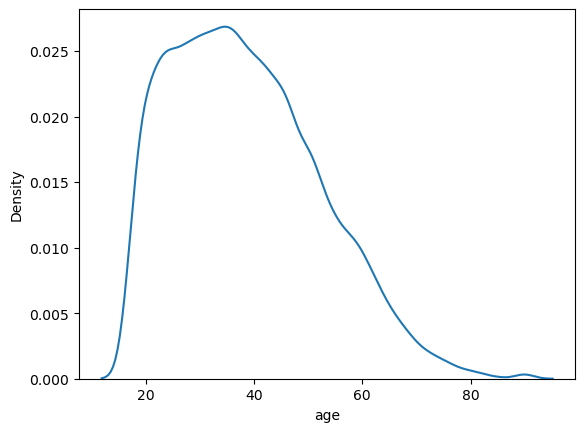

In [23]:
sns.kdeplot(x=df['age'])

In [24]:
df.workclass.mode()

0    Private
Name: workclass, dtype: object

In [25]:
df.occupation.mode()

0    Prof-specialty
Name: occupation, dtype: object

In [26]:
df['native.country'].mode()

0    United-States
Name: native.country, dtype: object

In [27]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [28]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

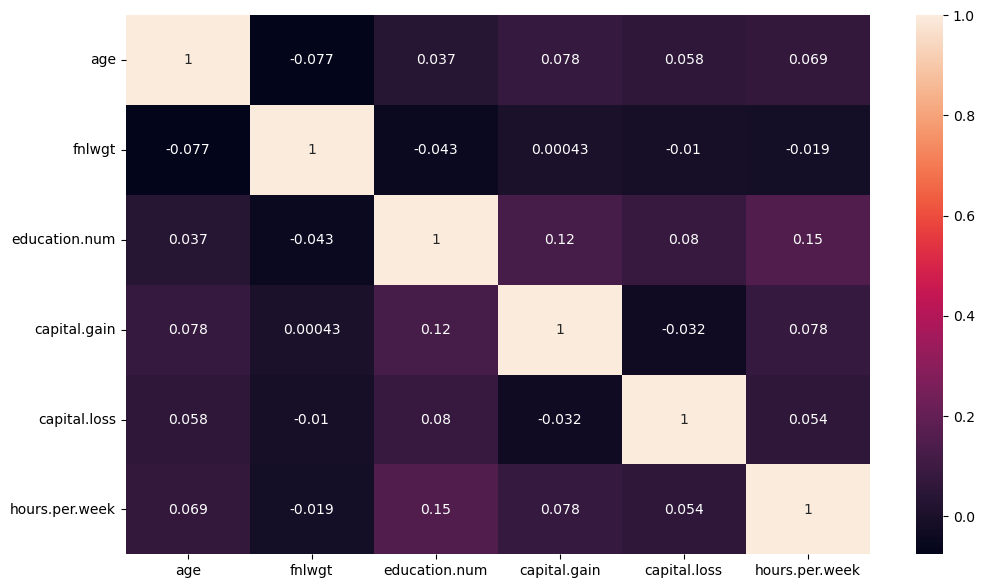

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

## Data spliting

In [30]:
x= df.drop('income',axis=1)
y= df['income']

In [31]:
x.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States


In [32]:
y.head(1)

0    <=50K
Name: income, dtype: object

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
x_train.isnull().sum()

age                  0
workclass         1268
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1273
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     427
dtype: int64

In [36]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [37]:
y_train.head(20)

19749    <=50K
1216     <=50K
27962    <=50K
23077    <=50K
10180    <=50K
12681    <=50K
31752    <=50K
17581    <=50K
31033    <=50K
9144     <=50K
26971     >50K
4907     <=50K
13308    <=50K
14737    <=50K
13857     >50K
5116     <=50K
16664    <=50K
25043    <=50K
8648      >50K
10755    <=50K
Name: income, dtype: object

## Feature Engineering

### Create pipeline

In [50]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
numeric_features= ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [58]:
numeric_features = x_train.select_dtypes('number').columns
categorical_features = x_train.select_dtypes('object').columns

In [59]:
numeric_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [60]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder())

col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features), 
    (categorical_transformer, categorical_features),
    remainder='passthrough')


## Model Fitting

### Logistic Regression

In [61]:
pipe_LR = make_pipeline(col_transformer, LogisticRegression())
pipe_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

In [63]:
pipe_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [64]:
pipe_LR.fit(x_train,y_train)
y_pred= pipe_LR.predict(x_test)
accuracy_score(y_test,y_pred)

0.8491145460128979

In [68]:
confusion_matrix(y_test,y_pred)

array([[6931,  498],
       [ 976, 1364]], dtype=int64)

### KNN

In [69]:
pipe_KNN = make_pipeline(col_transformer, KNeighborsClassifier())

In [70]:
pipe_KNN.fit(x_train,y_train)
y_pred= pipe_KNN.predict(x_test)
accuracy_score(y_test,y_pred)

0.8328385709898659

### Decision Tree

In [71]:
pipe_DT= make_pipeline(col_transformer, DecisionTreeClassifier())

In [72]:
pipe_DT.fit(x_train,y_train)
y_pred= pipe_DT.predict(x_test)
accuracy_score(y_test,y_pred)

0.8160507728529021

### Random Forest

In [73]:
pipe_RF = make_pipeline(col_transformer, RandomForestClassifier())

In [74]:
pipe_RF.fit(x_train,y_train)
y_pred= pipe_RF.predict(x_test)
accuracy_score(y_test,y_pred)

0.8529020370559934

### GradientBoosting 

In [75]:
pipe_GB = make_pipeline(col_transformer, GradientBoostingClassifier())

In [76]:
pipe_GB.fit(x_train,y_train)
y_pred= pipe_GB.predict(x_test)
accuracy_score(y_test,y_pred)

0.8641621455624936

### Adaboost

In [77]:
pipe_AB = make_pipeline(col_transformer, AdaBoostClassifier())

In [78]:
pipe_AB.fit(x_train,y_train)
y_pred= pipe_AB.predict(x_test)
accuracy_score(y_test,y_pred)

0.8604770191421844

### SVM

In [79]:
pipe_SVC = make_pipeline(col_transformer, SVC())

In [80]:
pipe_SVC.fit(x_train,y_train)
y_pred= pipe_SVC.predict(x_test)
accuracy_score(y_test,y_pred)

0.8563824342307299

## Conclusion

## Dump model in pickle

In [82]:
import pickle

In [83]:
pickle.dump(pipe_GB,open('pipe_GB.pickle','wb'))